In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("mnist_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X_train = mnist.train.images
y_train = mnist.train.labels

In [5]:
X_val = mnist.validation.images
y_val = mnist.validation.labels

In [6]:
X_test = mnist.test.images
y_test = mnist.test.labels

In [8]:
n_input = X_train.shape[1]

In [9]:
n_output = y_train.shape[1]

In [10]:
n_clu1 = 256

In [11]:
n_hidden = 128

In [12]:
x = tf.placeholder(tf.float32,shape=(None,n_input),name="x")
y = tf.placeholder(tf.float32,shape=(None,n_output),name="y")

In [13]:
w_1 = tf.Variable(tf.random.normal([n_input,n_clu1]),dtype = tf.float32,name="w_1")
b_1 = tf.Variable(tf.random.normal([n_clu1]),dtype = tf.float32,name="b_1")
z_1 = tf.matmul(x,w_1)+b_1
a_1 = tf.nn.relu(z_1)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
w_2 = tf.Variable(tf.random.normal([n_clu1,n_output]),dtype = tf.float32,name="w_2")
b_2 = tf.Variable(tf.zeros([n_output]),dtype = tf.float32,name="b_2")
z_2 = tf.matmul(a_1,w_2)+b_2
y_hat = tf.nn.softmax(z_2)

In [30]:
num_epoch = 100
bacth_size = 100
num_batch = int(mnist.train.num_examples/bacth_size)
learning_rate = 0.001

In [22]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_hat+tf.pow(10.0,-9)),axis=1))

In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [24]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_hat,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [31]:
cost_batch = []
val_acc = []
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epoch):
        for bacth in range(num_batch):
            # 取一个子集
            batch_x,batch_y = mnist.train.next_batch(bacth_size)
            tfs.run(optimizer,feed_dict={x:batch_x,y:batch_y})
            cost_val = tfs.run(cost,feed_dict={x:batch_x,y:batch_y})
            cost_batch.append(cost_val)
        test_val = tfs.run(acc,feed_dict={x:X_val,y:y_val})
        val_acc.append(test_val)
    test_acc = tfs.run(acc,feed_dict={x:X_test,y:y_test})

In [32]:
test_acc

0.9678

optimizer = GradientDescentOptimizer, learning_rate = 0.01, n_1 = 256, batch_size = 100


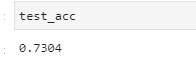


optimizer = GradientDescentOptimizer, learning_rate = 0.001, n_1 = 256, batch_size = 100

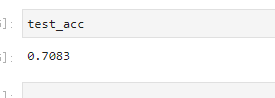

optimizer = AdamOptimizer, learning_rate = 0.001, n_1 = 256, batch_size = 100

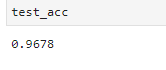

optimizer = AdamOptimizer, learning_rate = 0.01, n_1 = 256, batch_size = 100

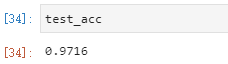